## 3D Plotting for the Muon Data
### Alexandra Higley

Notebook for getting a single plot for some Muon Data file. The purpose is to create a 3D plot with the positional data of the muons and the energy projected onto the plot as a colormap. 

In [1]:
import numpy as np
import pandas as pd
import h5py
import matplotlib
import matplotlib.pyplot as plt 
import matplotlib.ticker as ticker
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits import mplot3d
from matplotlib import rcParams
import os
from scipy.interpolate import griddata

First, I am establishing the path to the desired data file, and then I am opening the .h5 file. h5 files are like a bunch of spreadsheets stacked on top of each other, and the tables can be established in things other than PANDAS, but for this PANDAS tables were used. When opening, you have to specifiy a mode (for this, it is "r" for read). I then use some os commands to pull out the numerical part of the file name so that I can use it later when titling my plots. The keys are the names for the different tables in the file. Our data is in ```/CHITS/highTh```.

All the data is generated. 

In [2]:
path = "/Users/alexh/Desktop/Coding/Argonne/MCgeneratedMuons/esmeralda-1159-MUONS.h5"
#path = "/Users/alexh/Desktop/Coding/Argonne/MCgeneratedMuons/esmeralda-2839-MUONS.h5"
#path = "/Users/alexh/Desktop/Coding/Argonne/MCgeneratedMuons/esmeralda-2199-MUONS.h5"
#path = "/Users/alexh/Desktop/Coding/Argonne/MCgeneratedMuons/esmeralda-2992-MUONS.h5"
#path = "/Users/alexh/Desktop/Coding/Argonne/MCgeneratedMuons/esmeralda-2684-MUONS.h5"

hdf = pd.HDFStore(path, mode='r')
#open file on read mode

f_name, f_ext = os.path.splitext(path)
ext = os.path.basename(f_name)
name = ext[10:14]

In [3]:
hdf.keys() #list out all the keys
# not working for some reason ??
# it is because it only works in python 2 lmao

[]

Here I am calling the data of the events by reading in the data from ```/CHITS/highTh```. I also display it just because

In [4]:
events_data=pd.read_hdf(hdf,key='/CHITS/highTh')
pd.set_option("max_rows", None) #not truncating the rows so I can see everything 
#events_data

### 2D Plots

Before doing the 3D plots, I wanted to vizulaize the 2D planes. Here I call the positional data from ```events_data``` and make sure they are all the same size. Then I go on to plot X-Y, X-Z, and Y-Z. 

In [5]:
x = events_data.X
y = events_data.Y
z = events_data.Z

print(len(x))
print(len(y))
print(len(z))

506
506
506


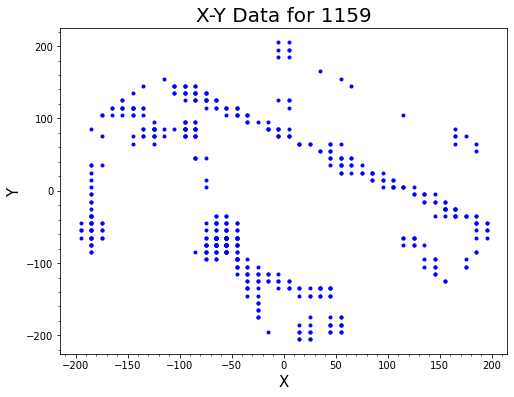

In [6]:
plt.figure(figsize=(8, 6))
plt.scatter(x, y, marker=".", color='b')
plt.title("X-Y Data for " + name, fontsize=20)
plt.xlabel('X', fontsize=15)
plt.ylabel('Y', fontsize=15)
plt.minorticks_on()

plt.show()

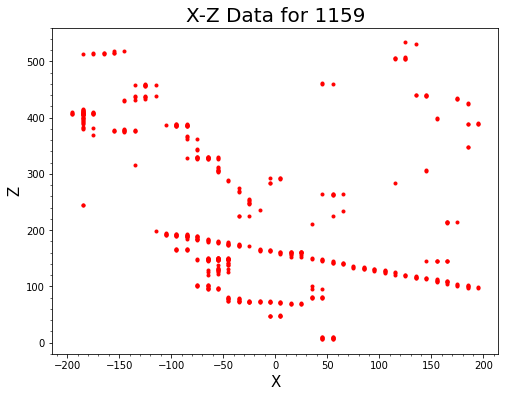

In [7]:
plt.figure(figsize=(8, 6))
plt.scatter(x, z, marker=".",color='r')
plt.title("X-Z Data for " + name, fontsize=20)
plt.xlabel('X', fontsize=15)
plt.ylabel('Z', fontsize=15)
plt.minorticks_on()

plt.show()

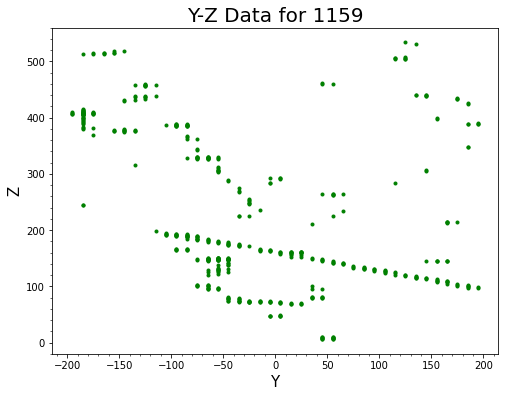

In [8]:
plt.figure(figsize=(8, 6))
plt.scatter(x, z, marker=".",color='g')
plt.title("Y-Z Data for " + name, fontsize=20)
plt.xlabel('Y', fontsize=15)
plt.ylabel('Z', fontsize=15)
plt.minorticks_on()

plt.show()

### 3D Plots

For the first 3D plot I just used ```ax.scatter``` to only visualize the positional data. I initially did not add a way to visualize energy or any kind of colormap— I just wanted to see what the events looked like. 

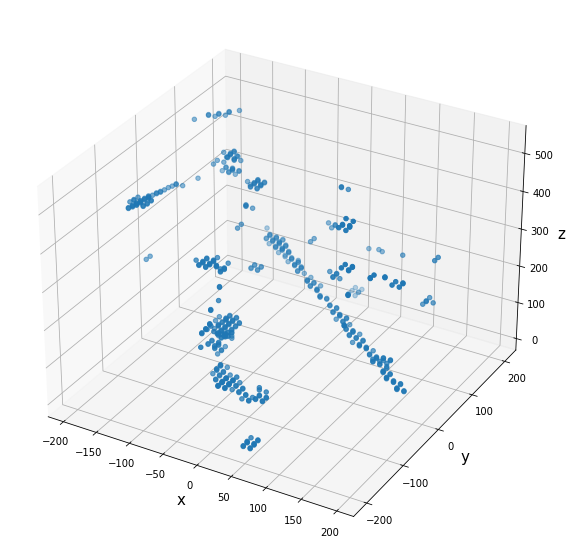

In [9]:
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter3D(x,y,z)
ax.set_xlabel('x',fontsize=15)
ax.set_ylabel('y',fontsize=15)
ax.set_zlabel('z',fontsize=15)
plt.show()

Then I added the colormap. The colormap represents the Energy (```Ec``` from ```/CHITS/highTh```, which I think is just ```E``` divided by the speed of light? Or scaled to it?). It might be noticed that the large majority of the data points have a low Ec relative to the data point with the highest datapoint (most less than 0.2 of the data point with the highest Ec)

Leslie was able to add lines of best fit to pick out a straight line track for the event, but I don't know how to do that yet and I am not sure if it is necessary for me. Until I know, this is the final plot. 

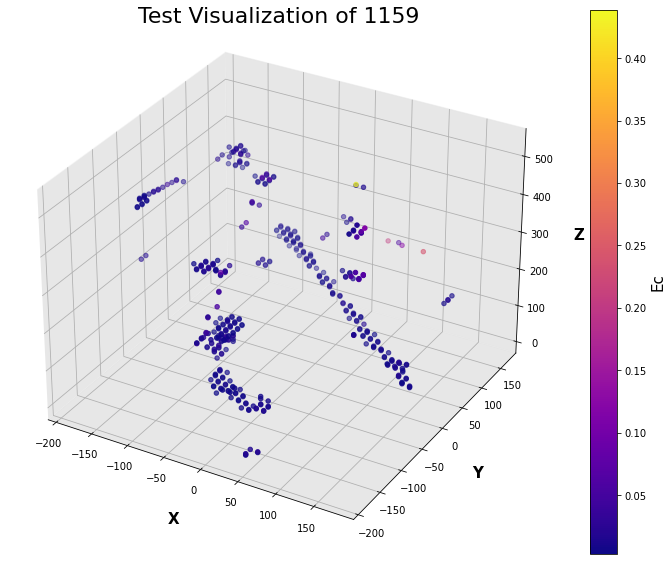

In [10]:
fig = plt.figure(figsize = (14, 10))
ax = plt.axes(projection ="3d")
ax.set_xlabel('X', fontsize=15, fontweight='bold')
ax.set_ylabel('Y', fontsize=15, fontweight='bold')
ax.set_zlabel('Z', fontsize=15, fontweight='bold')
ax.set_title("Test Visualization of " + name, fontsize=22, x=0.5, y=1.05)

#color_map = plt.get_cmap('YlOrRd_r')
#color_map = plt.get_cmap('RdYlBu_r')
color_map = plt.get_cmap('plasma')

#scatter_plot = ax.scatter3D(x, y, z, c=(events_data['Ec']/np.max(events_data['Ec'])), cmap = color_map)
#the above one is divided by highest Ec value so that Ec is scaled between 0-1
scatter_plot = ax.scatter3D(x, y, z, c=(events_data['Ec']), cmap = color_map)

ax.xaxis.pane.set_facecolor('#D0D0D0')
ax.yaxis.pane.set_facecolor('#D0D0D0')
ax.zaxis.pane.set_facecolor('#D0D0D0')

ax.xaxis.labelpad=15
ax.yaxis.labelpad=15
ax.zaxis.labelpad=15

#matplotlib.rcParams.update({"axes.grid" : True, "grid.color": "red"})
#If I want to change the grid color

cbar = plt.colorbar(scatter_plot)
cbar.set_label('Ec', fontsize=15)

plt.show()

## Deconvolution

Used a .h5 file made by beersheba from IC

In [11]:
path_RL = "/Users/alexh/Desktop/Coding/Argonne/beer_test_1159.h5"

hdf_RL = pd.HDFStore(path_RL, mode='r')
#open file on read mode

f_name_RL, f_ext_RL = os.path.splitext(path_RL)
ext_RL = os.path.basename(f_name_RL)
#name_RL = ext_RL[10:14]

In [12]:
deco=pd.read_hdf(hdf_RL,key='/DECO/Events')
print(len(deco.X))

84449


In [13]:
X_RL = deco.X
Y_RL = deco.Y
Z_RL = deco.Z

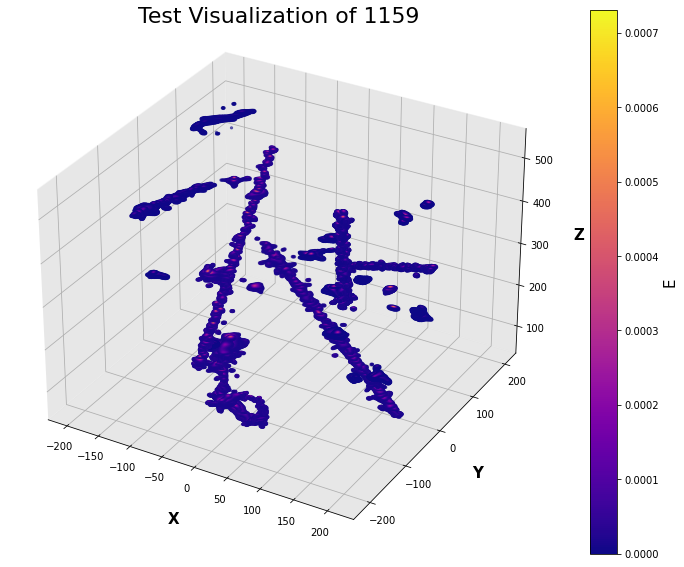

In [14]:
fig = plt.figure(figsize = (14, 10))
ax = plt.axes(projection ="3d")
ax.set_xlabel('X', fontsize=15, fontweight='bold')
ax.set_ylabel('Y', fontsize=15, fontweight='bold')
ax.set_zlabel('Z', fontsize=15, fontweight='bold')
ax.set_title("Test Visualization of " + name, fontsize=22, x=0.5, y=1.05)

#color_map = plt.get_cmap('YlOrRd_r')
#color_map = plt.get_cmap('RdYlBu_r')
color_map = plt.get_cmap('plasma')

#scatter_plot = ax.scatter3D(x, y, z, c=(events_data['Ec']/np.max(events_data['Ec'])), cmap = color_map)
#the above one is divided by highest Ec value so that Ec is scaled between 0-1
scatter_plot = ax.scatter3D(X_RL, Y_RL, Z_RL, c=(deco['E']), cmap = color_map, marker='.')

ax.xaxis.pane.set_facecolor('#D0D0D0')
ax.yaxis.pane.set_facecolor('#D0D0D0')
ax.zaxis.pane.set_facecolor('#D0D0D0')

ax.xaxis.labelpad=15
ax.yaxis.labelpad=15
ax.zaxis.labelpad=15

#matplotlib.rcParams.update({"axes.grid" : True, "grid.color": "red"})
#If I want to change the grid color

cbar = plt.colorbar(scatter_plot)
cbar.set_label('E', fontsize=15)

plt.show()

Side by side. Can't figure out how to get a color bar next to it withoug messing stuff up but i can fix that later 

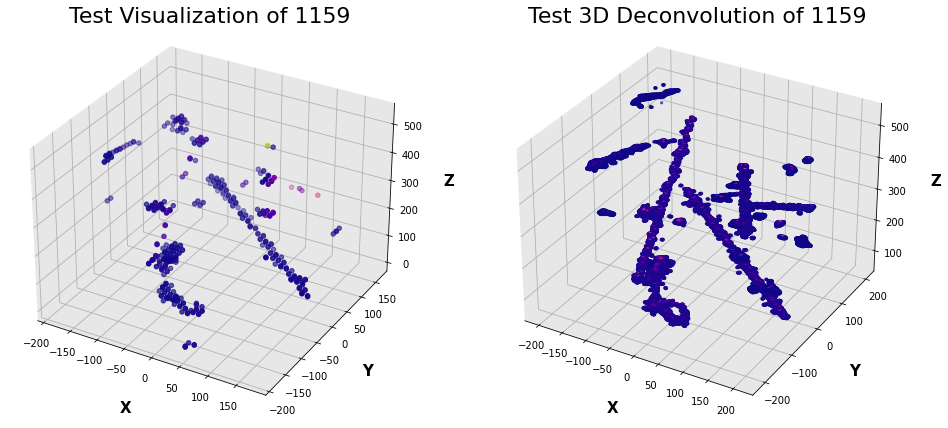

In [15]:
# Visualization
fig = plt.figure(figsize=(16, 12))
ax0 = fig.add_subplot(121, projection='3d')
color_map = plt.get_cmap('plasma')
scatter = ax0.scatter(x, y, z, c=(events_data['Ec']),cmap=color_map)

ax0.set_xlabel('X', fontsize=15, fontweight='bold')
ax0.set_ylabel('Y', fontsize=15, fontweight='bold')
ax0.set_zlabel('Z', fontsize=15, fontweight='bold')
ax0.set_title("Test Visualization of " + name, fontsize=22, x=0.5, y=1.05)

ax0.xaxis.pane.set_facecolor('#D0D0D0')
ax0.yaxis.pane.set_facecolor('#D0D0D0')
ax0.zaxis.pane.set_facecolor('#D0D0D0')

ax0.xaxis.labelpad=15
ax0.yaxis.labelpad=15
ax0.zaxis.labelpad=15

##################

ax1 = fig.add_subplot(122, projection='3d')
ax1.scatter(X_RL, Y_RL, Z_RL, c=(deco['E']), cmap = color_map, marker='.')

ax1.set_xlabel('X', fontsize=15, fontweight='bold')
ax1.set_ylabel('Y', fontsize=15, fontweight='bold')
ax1.set_zlabel('Z', fontsize=15, fontweight='bold')
ax1.set_title("Test 3D Deconvolution of " + name, fontsize=22, x=0.5, y=1.05)

ax1.xaxis.pane.set_facecolor('#D0D0D0')
ax1.yaxis.pane.set_facecolor('#D0D0D0')
ax1.zaxis.pane.set_facecolor('#D0D0D0')

ax1.xaxis.labelpad=15
ax1.yaxis.labelpad=15
ax1.zaxis.labelpad=15

#cbar = plt.colorbar(scatter_plot)
#cbar.set_label('Ec', fontsize=15)

plt.show()

This is good but I need to isolate the events via a column in Chit high. I also can try to overlay MC events from Chit high just to see what that looks like. 

## Isolating Events

In [16]:
en = events_data['E']
event_num = events_data.event
event_zero = np.where(event_num == 8)
datx_zero = (np.array(x))[event_zero]
daty_zero = (np.array(y))[event_zero]
datz_zero = (np.array(z))[event_zero]
date_zero = (np.array(en))[event_zero]

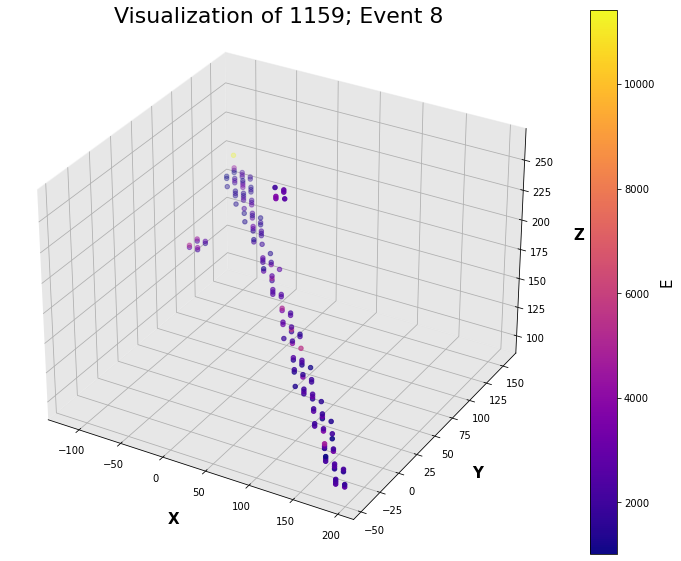

In [17]:
fig = plt.figure(figsize = (14, 10))
ax = plt.axes(projection ="3d")
ax.set_xlabel('X', fontsize=15, fontweight='bold')
ax.set_ylabel('Y', fontsize=15, fontweight='bold')
ax.set_zlabel('Z', fontsize=15, fontweight='bold')
ax.set_title("Visualization of " + name + "; Event 8", fontsize=22, x=0.5, y=1.05)

#color_map = plt.get_cmap('YlOrRd_r')
#color_map = plt.get_cmap('RdYlBu_r')
color_map = plt.get_cmap('plasma')

#scatter_plot = ax.scatter3D(x, y, z, c=(events_data['Ec']/np.max(events_data['Ec'])), cmap = color_map)
#the above one is divided by highest Ec value so that Ec is scaled between 0-1
scatter_plot = ax.scatter3D(datx_zero, daty_zero, datz_zero, c=(date_zero), cmap = color_map)

ax.xaxis.pane.set_facecolor('#D0D0D0')
ax.yaxis.pane.set_facecolor('#D0D0D0')
ax.zaxis.pane.set_facecolor('#D0D0D0')

ax.xaxis.labelpad=15
ax.yaxis.labelpad=15
ax.zaxis.labelpad=15

#matplotlib.rcParams.update({"axes.grid" : True, "grid.color": "red"})
#If I want to change the grid color

cbar = plt.colorbar(scatter_plot)
cbar.set_label('E', fontsize=15)

plt.show()

In [18]:
en_RL = deco['E']
event_num_RL = deco.event
event_zero_RL = np.where(event_num_RL == 8)
datx_zero_RL = (np.array(X_RL))[event_zero_RL]
daty_zero_RL = (np.array(Y_RL))[event_zero_RL]
datz_zero_RL = (np.array(Z_RL))[event_zero_RL]
date_zero_RL = (np.array(en_RL))[event_zero_RL]

topp = np.array(en_RL)
print(len(topp))

locc = np.where(date_zero_RL >= 0.00005)
print(locc)

underx = datx_zero_RL[locc]
undery = daty_zero_RL[locc]
underz = datz_zero_RL[locc]
undere = date_zero_RL[locc]

84449
(array([   15,    16,    17, ..., 16088, 16096, 16097]),)


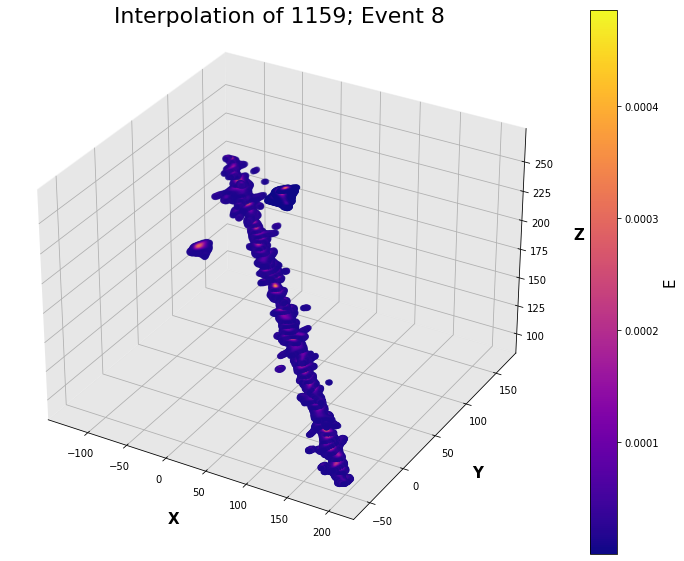

In [19]:
fig = plt.figure(figsize = (14, 10))
ax = plt.axes(projection ="3d")
ax.set_xlabel('X', fontsize=15, fontweight='bold')
ax.set_ylabel('Y', fontsize=15, fontweight='bold')
ax.set_zlabel('Z', fontsize=15, fontweight='bold')
ax.set_title("Interpolation of " + name + "; Event 8", fontsize=22, x=0.5, y=1.05)

#color_map = plt.get_cmap('YlOrRd_r')
#color_map = plt.get_cmap('RdYlBu_r')
color_map = plt.get_cmap('plasma')

#scatter_plot = ax.scatter3D(x, y, z, c=(events_data['Ec']/np.max(events_data['Ec'])), cmap = color_map)
#the above one is divided by highest Ec value so that Ec is scaled between 0-1
scatter_plot = ax.scatter3D(datx_zero_RL, daty_zero_RL, datz_zero_RL, c=(date_zero_RL), cmap = color_map)

ax.xaxis.pane.set_facecolor('#D0D0D0')
ax.yaxis.pane.set_facecolor('#D0D0D0')
ax.zaxis.pane.set_facecolor('#D0D0D0')

ax.xaxis.labelpad=15
ax.yaxis.labelpad=15
ax.zaxis.labelpad=15

#matplotlib.rcParams.update({"axes.grid" : True, "grid.color": "red"})
#If I want to change the grid color

cbar = plt.colorbar(scatter_plot)
cbar.set_label('E', fontsize=15)

plt.show()

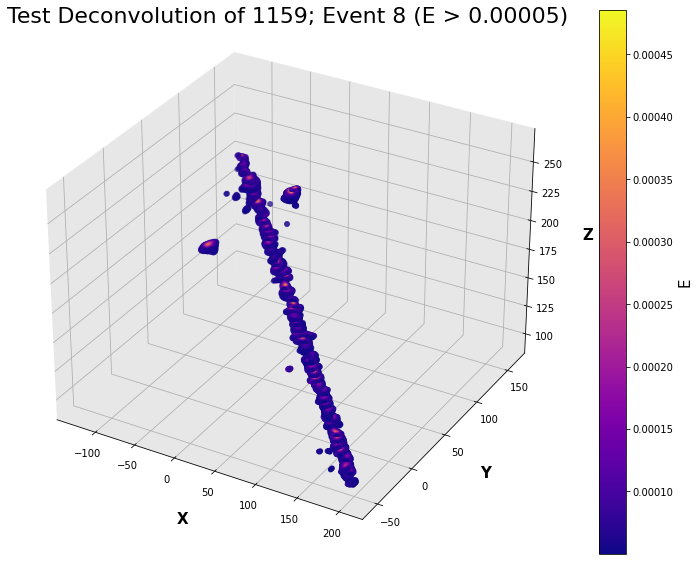

In [20]:
fig = plt.figure(figsize = (14, 10))
ax = plt.axes(projection ="3d")
ax.set_xlabel('X', fontsize=15, fontweight='bold')
ax.set_ylabel('Y', fontsize=15, fontweight='bold')
ax.set_zlabel('Z', fontsize=15, fontweight='bold')
ax.set_title("Test Deconvolution of " + name + "; Event 8 (E > 0.00005)", fontsize=22, x=0.5, y=1.05)

#color_map = plt.get_cmap('YlOrRd_r')
#color_map = plt.get_cmap('RdYlBu_r')
color_map = plt.get_cmap('plasma')

#scatter_plot = ax.scatter3D(x, y, z, c=(events_data['Ec']/np.max(events_data['Ec'])), cmap = color_map)
#the above one is divided by highest Ec value so that Ec is scaled between 0-1
scatter_plot = ax.scatter3D(underx, undery, underz, c=(undere), cmap = color_map)

ax.xaxis.pane.set_facecolor('#D0D0D0')
ax.yaxis.pane.set_facecolor('#D0D0D0')
ax.zaxis.pane.set_facecolor('#D0D0D0')

ax.xaxis.labelpad=15
ax.yaxis.labelpad=15
ax.zaxis.labelpad=15

#matplotlib.rcParams.update({"axes.grid" : True, "grid.color": "red"})
#If I want to change the grid color

cbar = plt.colorbar(scatter_plot)
cbar.set_label('E', fontsize=15)

plt.show()

## Report Plots

I need to figure out how the units on the energy color plots work

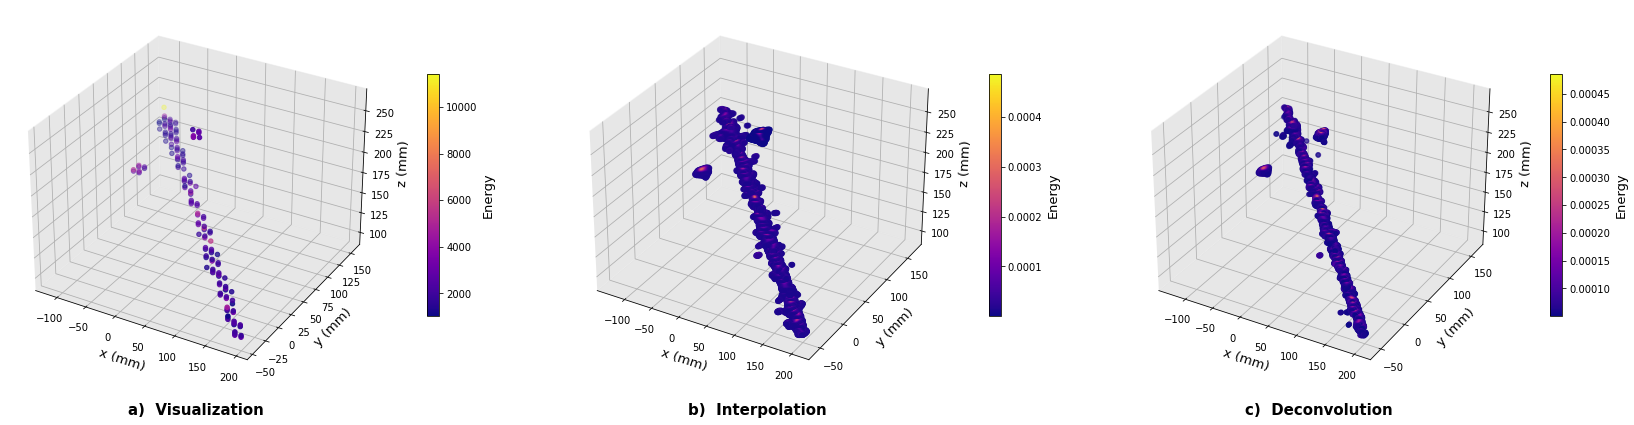

In [99]:
fig = plt.figure(figsize=(18,8))

ax1 = fig.add_subplot(131, projection='3d')
ax1.set_xlabel('x (mm)', fontsize=13)
ax1.set_ylabel('y (mm)', fontsize=13)
ax1.set_zlabel('z (mm)', fontsize=13)
#ax.set_title("Visualization of " + name + "; Event 8", fontsize=22, x=0.5, y=1.05)
ax1.set_title("a)  Visualization", fontsize=15, y=-0.05, pad=-14, fontweight='bold')

color_map1 = plt.get_cmap('plasma')

scatter_plot1 = ax1.scatter3D(datx_zero, daty_zero, datz_zero, c=(date_zero), cmap = color_map)

ax1.xaxis.pane.set_facecolor('#D0D0D0')
ax1.yaxis.pane.set_facecolor('#D0D0D0')
ax1.zaxis.pane.set_facecolor('#D0D0D0')


cbar1 = plt.colorbar(scatter_plot1, ax=ax1, fraction=0.028, pad=0.1)
cbar1.set_label('Energy', fontsize=13)


###################################################################

ax2 = fig.add_subplot(132, projection='3d')
ax2.set_xlabel('x (mm)', fontsize=13)
ax2.set_ylabel('y (mm)', fontsize=13)
ax2.set_zlabel('z (mm)', fontsize=13)
#ax2.set_title("Interpolation of " + name + "; Event 8", fontsize=22, x=0.5, y=1.05)
ax2.set_title("b)  Interpolation", fontsize=15, y=-0.05, pad=-14, fontweight='bold')

color_map2 = plt.get_cmap('plasma')

scatter_plot2 = ax2.scatter3D(datx_zero_RL, daty_zero_RL, datz_zero_RL, c=(date_zero_RL), cmap = color_map)

ax2.xaxis.pane.set_facecolor('#D0D0D0')
ax2.yaxis.pane.set_facecolor('#D0D0D0')
ax2.zaxis.pane.set_facecolor('#D0D0D0')


cbar2 = plt.colorbar(scatter_plot2, ax=ax2, fraction=0.028, pad=0.1)
cbar2.set_label('Energy', fontsize=13)

###################################################################

ax3 = fig.add_subplot(133, projection='3d')
ax3.set_xlabel('x (mm)', fontsize=13)
ax3.set_ylabel('y (mm)', fontsize=13)
ax3.set_zlabel('z (mm)', fontsize=13)
#ax3.set_title("Test Deconvolution of " + name + "; Event 8 (E > 0.00005)", fontsize=22)
ax3.set_title("c)  Deconvolution", fontsize=15, y=-0.05, pad=-14, fontweight='bold')

color_map3 = plt.get_cmap('plasma')

scatter_plot3 = ax3.scatter3D(underx, undery, underz, c=(undere), cmap = color_map1)

ax3.xaxis.pane.set_facecolor('#D0D0D0')
ax3.yaxis.pane.set_facecolor('#D0D0D0')
ax3.zaxis.pane.set_facecolor('#D0D0D0')

#ax3.xaxis.labelpad=10
#ax3.yaxis.labelpad=10
#ax3.zaxis.labelpad=10

cbar3 = plt.colorbar(scatter_plot3, ax=ax3, fraction=0.028, pad=0.1)
cbar3.set_label('Energy', fontsize=13)


plt.subplots_adjust(left=0,
                    bottom=0, 
                    right=1.2, 
                    top=0.9, 
                    wspace=0.3, 
                    hspace=0.4)

plt.show()